# Predicting Song Popularity
***
<img src= 'IMAGES/header.jpg' width=10000 />

## Introduction
***
In the age of technology, it has become a lot easier for artists to upload their music to streaming platforms and gain popularity. It seems that almost everyday, artists come out with new songs, but generating a lot of music does not necessarily mean your tracks will be popular. I wanted to understand what constitutes a popular song.  The popular music streaming service, Spotify, has an API that allows access to several of their databases. One of the datasets examines audio features of thousands of tracks dating back to the 1920s. Reviewing aspects of these audio features that make a song popular can help artists create pieces that their audience will enjoy. This analysis's objective was to build classifying models that could predict a song's popularity given various audio features obtained from the Spotify API in hopes of helping artists gain popularity.

## Overview of the Data
***
Spotify is one of the most popular music streaming services around. They have an emmense collection of songs dating back to 1921. I obtained a dataset from the [kaggle website](https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks) which contains over 175,000 songs between the years 1921-2020. This data was obtained from the Spotify API and I obtained further data using the API to get songs that were newly added in 2021. Spotify characterizes each of these songs with 13 audio features and also assigns each song a popularity score ranging from 0-100. 

The dataset contained:
* 170,000+ tracks
* About 30,000+ artists
* 17 track audio_features

### Audio Features and their descriptions obtained from [Spotify API website](https://developer.spotify.com/documentation/web-api/reference/#endpoint-get-audio-features)

#### Content
The "data.csv" file contains more than 170.000 songs collected from Spotify Web API, and also you can find data grouped by artist, year, or genre in the data section.

#### Primary:
- id 
    - Id of track generated by Spotify
    
#### Numerical:
- acousticness (Ranges from 0 to 1): The positiveness of the track
    - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- danceability (Ranges from 0 to 1)
    - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- energy (Ranges from 0 to 1)
    - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
- duration_ms (Integer typically ranging from 200k to 300k)
    - The duration of the track in milliseconds.
- instrumentalness (Ranges from 0 to 1)
    - Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
- valence (Ranges from 0 to 1)
    - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- popularity (Ranges from 0 to 100)
    - The popularity of the album. The value will be between 0 and 100, with 100 being the most popular. The popularity is calculated from the popularity of the album’s individual tracks.
- tempo (Float typically ranging from 50 to 150)
    - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
- liveness (Ranges from 0 to 1)
    - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
- loudness (Float typically ranging from -60 to 0)
    - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
- speechiness (Ranges from 0 to 1)
    - Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
- year 
    - Ranges from 1921 to 2020

#### Dummy:
- mode (0 = Minor, 1 = Major)
    - Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
- explicit (0 = No explicit content, 1 = Explicit content)

#### Categorical:
- key (All keys on octave encoded as values ranging from 0 to 11
    - The key the track is in. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.
- artists (List of artists mentioned)
    - The artists of the album. Each artist object includes a link in href to more detailed information about the artist.
- release_date (Date of release mostly in yyyy-mm-dd format, however precision of date may vary)
    - The date the album was first released, for example “1981-12-15”. Depending on the precision, it might be shown as “1981” or “1981-12”.
- name 
    - The name of the album. In case of an album takedown, the value may be an empty string.
    
## Exploratory Data Analysis
***

### Popularity Distribution
I first took a look at the distribution of the popularity scores. I noticed that a majority of the songs in this dataset are not that popular. Since I used this column to create a binary column for classification, I determined a good threshold would be a value of 35.

<img src= 'IMAGES/pop_dist.png' width=700>

### Top 10 most popular tracks
With such an interesting dataset at my disposal, I wanted to see what were the top 10 most popular tracks on Spotify

<img src = 'IMAGES/top10_tracks.png'>

### Top 20 most popular artists

I also wanted to know which artists were the most popular
<img src='IMAGES/top20_artists.png'>

### Time series analysis of audio features over time
I was interested to see how these audio features changed over time so I performed a time series analysis

<img src='IMAGES/ts_audio.png'>


### Time series analysis of popularity over time
I also wanted to see how popularity looked over time. Most songs from 1920s - early 1950s did not receive high popularity ratings. When you think about it that makes sense. Many people using spotify are not really gonna be listening to music from the 1920s - late 1940s. 

<img src='IMAGES/pop_ts.png'>


### Audio Features Distribution

I wanted to look at the distribution of each individual audio feature. Judging by some of these features, it looks like performing linear regression may be difficult.

<img src='IMAGES/af_dist.png'>

### Heatmap
Lastly, I wanted to take a look at the correlation between all the audio features to see if there was any possible multicollinearity. Year and popularity were very highly correlated.

<img src='IMAGES/heatmap.png'>

# Classification Models
***

In [1]:
%load_ext autoreload
%autoreload 2
from functions import *

In [2]:
# Import necessary libraries/packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import itertools
from sklearn import metrics

from sklearn.model_selection import (train_test_split, GridSearchCV,
                                     RandomizedSearchCV, cross_val_score)

from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
                              
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (BaggingClassifier, RandomForestClassifier,
RandomForestRegressor)

from sklearn.metrics import (classification_report, confusion_matrix, 
                             plot_confusion_matrix, precision_score, 
                             accuracy_score, recall_score, f1_score, roc_curve, 
                             auc)

from scipy.special import logit

plt.style.use('seaborn')

import shap
shap.initjs()

from alibi.explainers import KernelShap
from scipy.special import logit

from sklearn.feature_extraction.text import TfidfVectorizer

***
# Preprocessing data
***

In [3]:
# Load dataset and ceate pd dataframes
raw_df = pd.read_csv('../DATA/data.csv')

In [4]:
raw_df.describe().round(2)

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.00,170653.00,170653.00,170653.00,170653.00,170653.00,170653.00,170653.00,170653.00,170653.00,170653.00,170653.00,170653.00,170653.00,170653.00
mean,0.53,1976.79,0.50,0.54,230948.31,0.48,0.08,0.17,5.20,0.21,-11.47,0.71,31.43,0.10,116.86
std,0.26,25.92,0.38,0.18,126118.41,0.27,0.28,0.31,3.52,0.17,5.70,0.46,21.83,0.16,30.71
min,0.00,1921.00,0.00,0.00,5108.00,0.00,0.00,0.00,0.00,0.00,-60.00,0.00,0.00,0.00,0.00
25%,0.32,1956.00,0.10,0.42,169827.00,0.26,0.00,0.00,2.00,0.10,-14.62,0.00,11.00,0.03,93.42
50%,0.54,1977.00,0.52,0.55,207467.00,0.47,0.00,0.00,5.00,0.14,-10.58,1.00,33.00,0.04,114.73
75%,0.75,1999.00,0.89,0.67,262400.00,0.70,0.00,0.10,8.00,0.26,-7.18,1.00,48.00,0.08,135.54
max,1.00,2020.00,1.00,0.99,5403500.00,1.00,1.00,1.00,11.00,1.00,3.86,1.00,100.00,0.97,243.51


In [5]:
raw_df.shape

(170653, 19)

## Popularity Distribution
Using classification models, I want to predict the popularity of a song given the features of tha data set. This data set includes a column for song popularity, which is ranges from 0-100, with 100 being the most popular. I will plot the popularity distribution of these scores using a popularity threshold of 35. Any song with a popularity <= 35 will be deemed unpopular(0) and any song with a popularity >= 35 will be deemed popular(1).

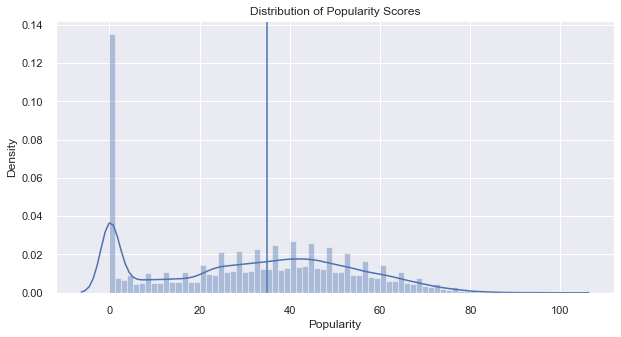

In [6]:
fig = plt.figure(figsize=(10,5))
sns.set(style="darkgrid") 
sns.distplot(raw_df['popularity'], label="Popularity", bins='auto')
plt.xlabel("Popularity")
plt.ylabel("Density")
plt.title("Distribution of Popularity Scores")
plt.axvline(35)
plt.show()

## Create caterogrical (binary) target
In order to create a variable to be the target of this classification analysis, I decided to use a popularity of 35 as a threshold value. In this step, I will create a new binary column named "popular". This column will have a threshold of 35 popularity. If the song popularity is greater than or equal to 35, then it will be classified a popular song (1). Otherwise, the song is not popular (0). I will build other models that have different threshold values and compare model performance.

In [7]:
raw_df['popular'] = (raw_df['popularity'] >= 35).astype('int')
raw_df['popular'].value_counts(1)

0    0.516838
1    0.483162
Name: popular, dtype: float64

In [8]:
raw_df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,popular
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,0
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,0
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339,0
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109,0
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,0


In [9]:
# Save raw dataframe with 'popular column' as csv file and store in DATA folder
raw_df.to_csv('../DATA/raw_df.csv') 

## Make a new dataframe with necessary information

In [10]:
df = raw_df[['valence', 'year', 'acousticness', 'danceability', 'duration_ms',
             'energy', 'instrumentalness', 'liveness', 'loudness', 
          'speechiness', 'tempo', 'key', 'popular']]

In [11]:
df.head()

,valence,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,key,popular
0,0.0594,1921,0.982,0.279,831667,0.211,0.878000,0.665,-20.096,0.0366,80.954,10,0
1,0.9630,1921,0.732,0.819,180533,0.341,0.000000,0.160,-12.441,0.4150,60.936,7,0
2,0.0394,1921,0.961,0.328,500062,0.166,0.913000,0.101,-14.850,0.0339,110.339,3,0
3,0.1650,1921,0.967,0.275,210000,0.309,0.000028,0.381,-9.316,0.0354,100.109,5,0
4,0.2530,1921,0.957,0.418,166693,0.193,0.000002,0.229,-10.096,0.0380,101.665,3,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   danceability      170653 non-null  float64
 4   duration_ms       170653 non-null  int64  
 5   energy            170653 non-null  float64
 6   instrumentalness  170653 non-null  float64
 7   liveness          170653 non-null  float64
 8   loudness          170653 non-null  float64
 9   speechiness       170653 non-null  float64
 10  tempo             170653 non-null  float64
 11  key               170653 non-null  int64  
 12  popular           170653 non-null  int64  
dtypes: float64(9), int64(4)
memory usage: 16.9 MB


# Logistic Regression Models
***

## LR Model 1: Baseline model

### Define X and y

In [13]:
X = df[['valence', 'acousticness', 'danceability', 'duration_ms',
             'energy', 'instrumentalness', 'liveness', 'loudness', 
          'speechiness', 'tempo', 'key']]

y = df['popular']

### Train Test Split

In [14]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=42)

### Standardize train and test sets

In [15]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns,
                       index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test),columns=X.columns,
                      index=X_test.index)

In [16]:
X_train.describe()

,valence,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,key
count,1.279890e+05,1.279890e+05,1.279890e+05,1.279890e+05,1.279890e+05,1.279890e+05,1.279890e+05,1.279890e+05,1.279890e+05,1.279890e+05,1.279890e+05
mean,-5.010312e-16,1.989135e-16,-2.233406e-16,3.375368e-17,-2.270601e-17,-6.162267e-17,-8.449523e-17,-1.749862e-16,-1.221350e-17,-1.965819e-16,6.872871e-17
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-2.009135e+00,-1.334439e+00,-3.051065e+00,-1.804732e+00,-1.803641e+00,-5.324759e-01,-1.177821e+00,-8.526212e+00,-6.058416e-01,-3.805010e+00,-1.477230e+00
25%,-8.050031e-01,-1.063191e+00,-6.941392e-01,-4.906357e-01,-8.510256e-01,-5.324759e-01,-6.125898e-01,-5.538219e-01,-3.895165e-01,-7.642656e-01,-9.083984e-01
50%,4.206759e-02,3.243965e-02,5.553347e-02,-1.896643e-01,-4.410426e-02,-5.317792e-01,-3.997699e-01,1.555142e-01,-3.269124e-01,-7.101690e-02,-5.515034e-02
75%,8.321605e-01,1.040313e+00,7.427334e-01,2.531205e-01,8.263248e-01,-2.064863e-01,3.153506e-01,7.520733e-01,-1.378603e-01,6.063688e-01,7.980977e-01
max,1.789388e+00,1.314221e+00,2.560122e+00,3.238798e+01,1.932106e+00,2.663501e+00,4.543143e+00,2.690890e+00,5.406634e+00,4.126716e+00,1.651346e+00


### Instantiate classifier and fit

In [17]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

### Predict

In [18]:
pred = logreg.predict(X_test)

### Summary Plot Mean absolute error of each feature

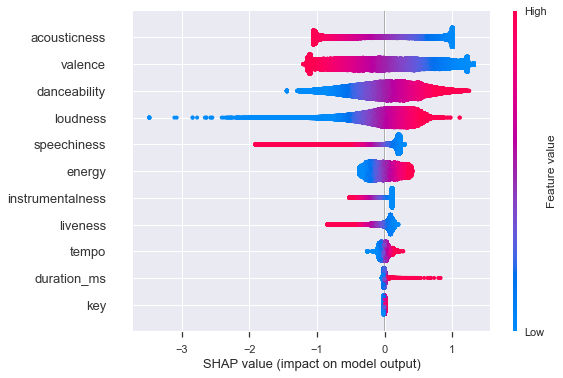

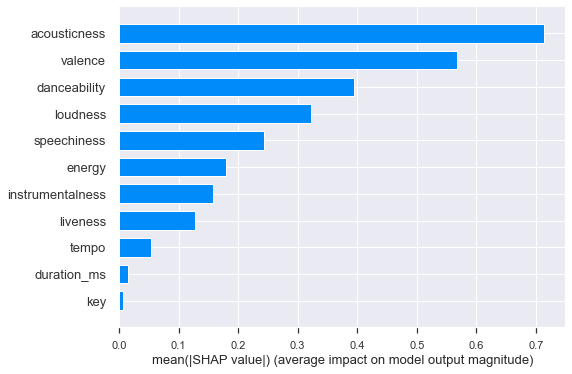

In [19]:
plot_shap(logreg, X_train)

X-axis: does it help the model more towards the positive outcome (popular) or negative outcome (not popular).

The newer songs are often more popular 

### Model Coefficients
"Generally, positive coefficients make the event more likely and negative coefficients make the event less likely. An estimated coefficient near 0 implies that the effect of the predictor is small."

“For every one-unit increase in [X variable], the odds that the observation is in (y class) are [coefficient] times as large as the odds that the observation is not in (y class) when all other variables are held constant.”

In [20]:
find_coeffs(logreg, X_train, X).style.background_gradient(cmap='coolwarm')

,coef
danceability,0.480870
loudness,0.409793
energy,0.209477
tempo,0.066586
duration_ms,0.025412
key,0.007105
liveness,-0.184288
instrumentalness,-0.197915
speechiness,-0.368268
valence,-0.665554


### Model Performance

Classification Report 
               precision    recall  f1-score   support

 Not Popular       0.76      0.76      0.76     22069
     Popular       0.75      0.75      0.75     20595

    accuracy                           0.76     42664
   macro avg       0.76      0.76      0.76     42664
weighted avg       0.76      0.76      0.76     42664



----------------------------------------------------------
Training Accuracy Score: 75.75%
Testing Accuracy Score: 75.67%
Accuracy: 75.67%


----------------------------------------------------------


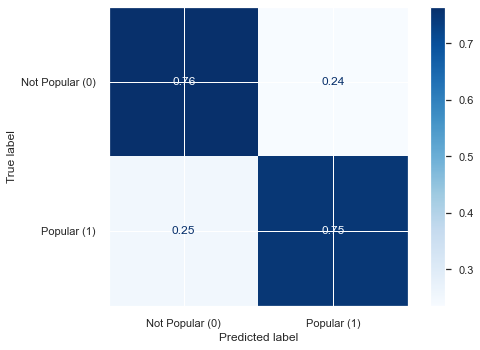

In [21]:
model_performance(logreg, X_train, X_test, y_train, y_test, pred)

### ROC Curve and AUC
"ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0s as 0s and 1s as 1s."

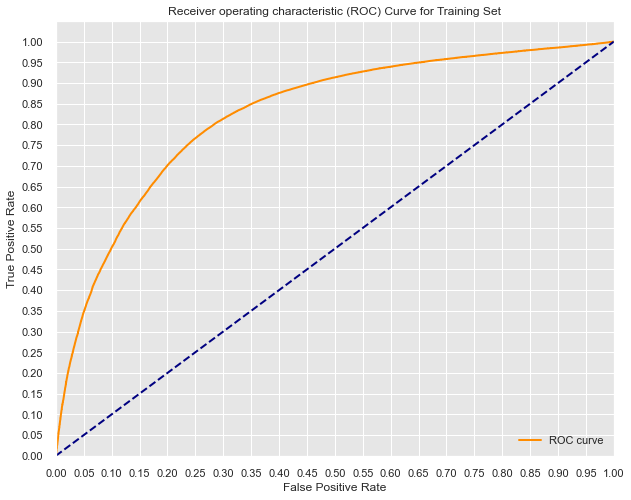

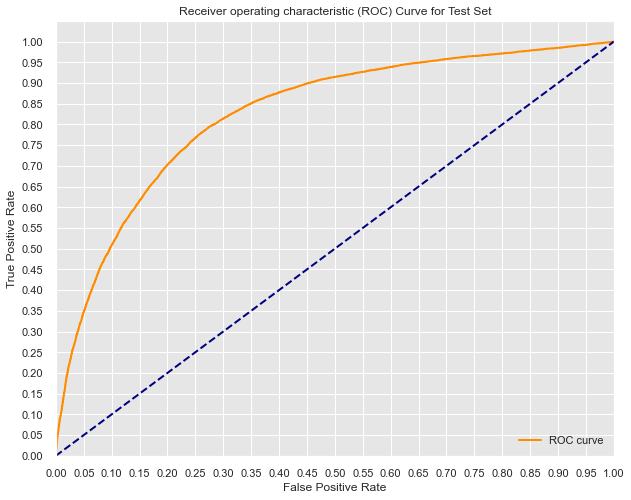

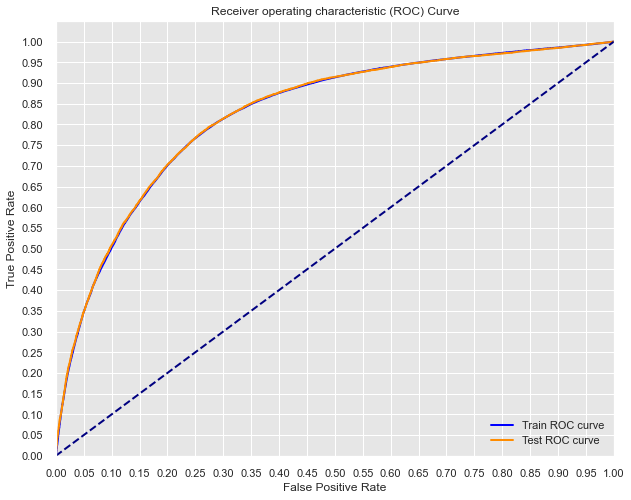

Train AUC: 0.8248905721724435
Test AUC: 0.8257122447769725


In [22]:
roc_auc(logreg, X_train, X_test, y_train, y_test)

AUC is looking pretty good but could be better. Also the ROC curve could be more perpendicular

***
## LR Model 2: LogisticRegressionCV

### Instantiate classifier and fit model

In [23]:
logregcv = LogisticRegressionCV()
logregcv.fit(X_train, y_train)

LogisticRegressionCV()

### Predict

In [24]:
pred = logregcv.predict(X_test)

### Summary Plot and Mean absolute error 

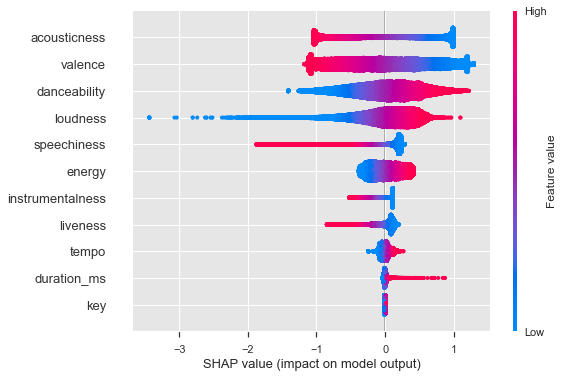

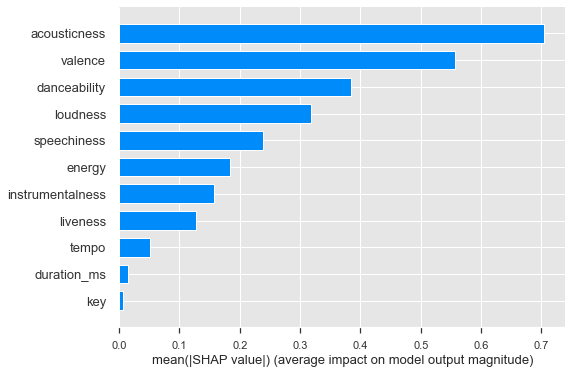

In [25]:
plot_shap(logregcv, X_train)

### Model  coefficients

In [26]:
find_coeffs(logregcv, X_train, X).style.background_gradient(cmap='coolwarm')

,coef
danceability,0.469579
loudness,0.404460
energy,0.214315
tempo,0.064652
duration_ms,0.026815
key,0.006954
liveness,-0.184105
instrumentalness,-0.197915
speechiness,-0.360529
valence,-0.651481


### Model Performance

Classification Report 
               precision    recall  f1-score   support

 Not Popular       0.77      0.76      0.76     22069
     Popular       0.75      0.75      0.75     20595

    accuracy                           0.76     42664
   macro avg       0.76      0.76      0.76     42664
weighted avg       0.76      0.76      0.76     42664



----------------------------------------------------------
Training Accuracy Score: 75.75%
Testing Accuracy Score: 75.7%
Accuracy: 75.7%


----------------------------------------------------------


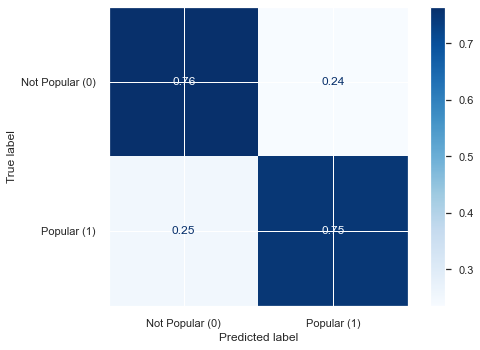

In [27]:
model_performance(logregcv, X_train, X_test, y_train, y_test, pred)

### ROC Curve and AUC

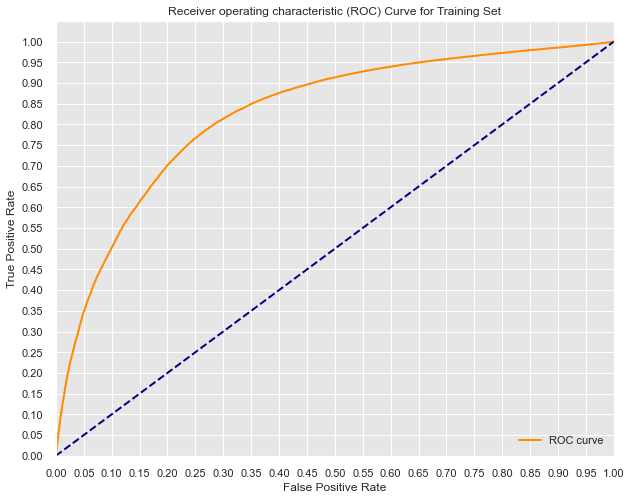

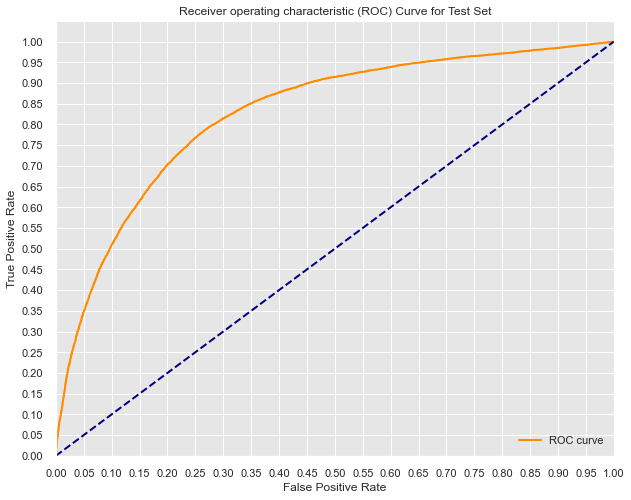

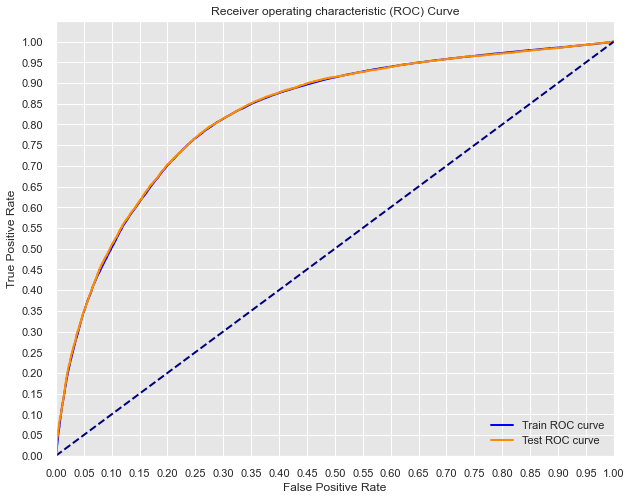

Train AUC: 0.8248832023412163
Test AUC: 0.8257318900637082


In [28]:
roc_auc(logregcv, X_train, X_test, y_train, y_test)

***
## LR Model 3: GridSearchCV

### Instantiate classifier

In [29]:
logreg = LogisticRegression()

### Create Parameter Grid 

In [30]:
log_param_grid = {
    'penalty' : ['l1', 'l2'],
    'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

### Instantiate GridSearchCV and fit

In [31]:
gs_log = GridSearchCV(logreg, log_param_grid, cv=3, return_train_score=True,
                      n_jobs=-1)

In [32]:
gs_log.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             return_train_score=True)

### Best parameters

In [33]:
print("Best Parameter Combination Found During Grid Search:")
gs_log.best_params_

Best Parameter Combination Found During Grid Search:


{'C': 0.01, 'penalty': 'l2'}

### Predict

In [34]:
pred = gs_log.predict(X_test)

### Summary Plot and Mean absolute error 

In [35]:
logreg_gs = LogisticRegression(C= 0.01, penalty= 'l2')

In [36]:
logreg_gs.fit(X_train, y_train)

LogisticRegression(C=0.01)

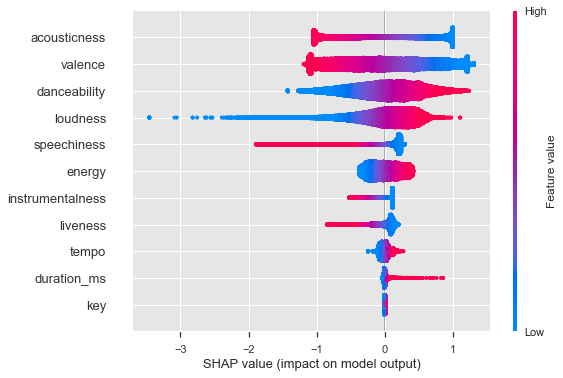

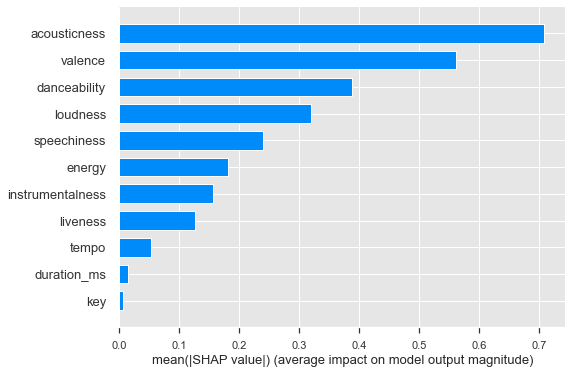

In [37]:
plot_shap(logreg_gs, X_train)

### Model Performance

Classification Report 
               precision    recall  f1-score   support

 Not Popular       0.77      0.76      0.76     22069
     Popular       0.75      0.75      0.75     20595

    accuracy                           0.76     42664
   macro avg       0.76      0.76      0.76     42664
weighted avg       0.76      0.76      0.76     42664



----------------------------------------------------------
Training Accuracy Score: 75.75%
Testing Accuracy Score: 75.68%
Accuracy: 75.68%


----------------------------------------------------------


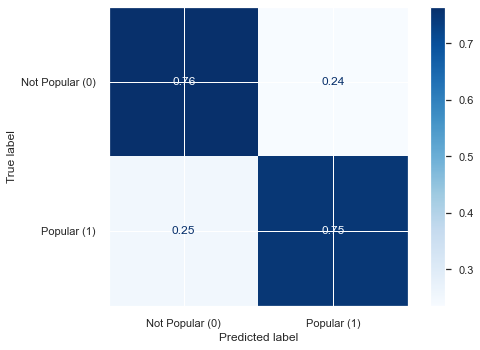

In [38]:
model_performance(gs_log, X_train, X_test, y_train, y_test, pred)

### ROC Curve and AUC

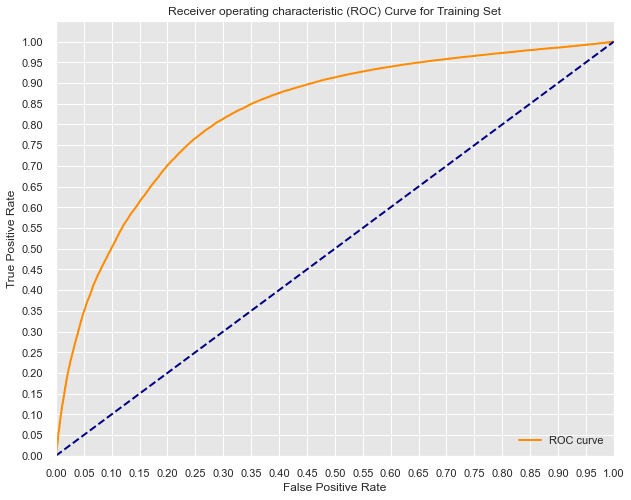

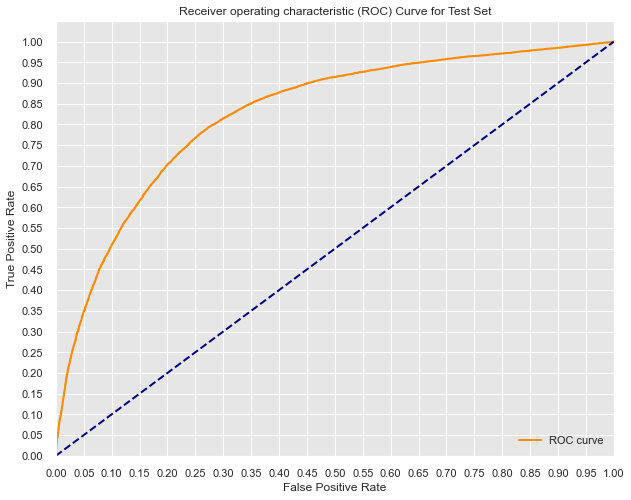

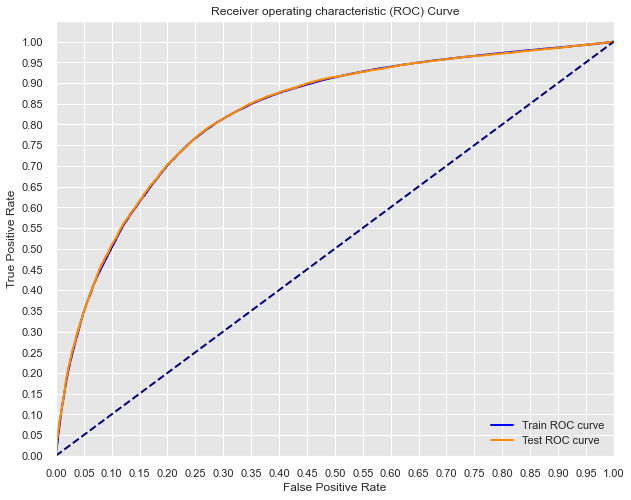

Train AUC: 0.8248878066523203
Test AUC: 0.825727714147679


In [39]:
roc_auc(gs_log, X_train, X_test, y_train, y_test)

***
# Decision Trees Models
***

## DT Model 1: Baseline DecisionTree Model

### Instantiate classifier and fit model

In [40]:
dtree_clf = DecisionTreeClassifier(max_depth=10) 
dtree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

### Predict

In [41]:
pred = dtree_clf.predict(X_test)

### Summary Plot Mean absolute error of each feature

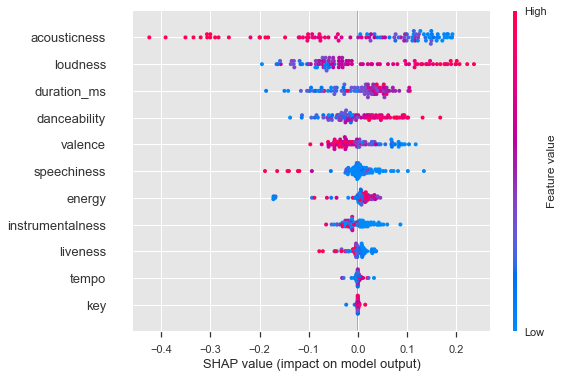

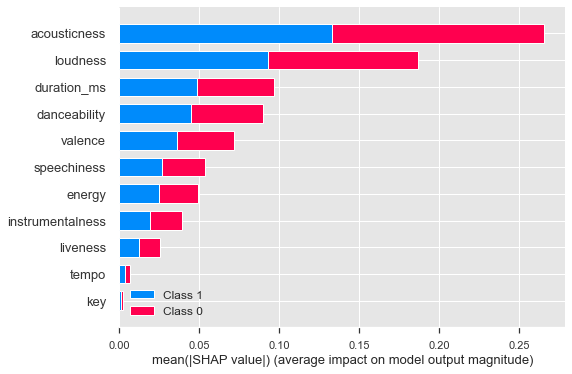

In [42]:
plot_shap_tree(dtree_clf, X_train, X)

### Model Performance

Classification Report 
               precision    recall  f1-score   support

 Not Popular       0.76      0.78      0.77     22069
     Popular       0.76      0.74      0.75     20595

    accuracy                           0.76     42664
   macro avg       0.76      0.76      0.76     42664
weighted avg       0.76      0.76      0.76     42664



----------------------------------------------------------
Training Accuracy Score: 78.41%
Testing Accuracy Score: 76.1%
Accuracy: 76.1%


----------------------------------------------------------


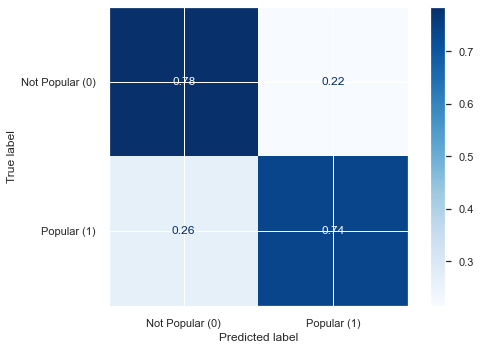

In [43]:
model_performance(dtree_clf, X_train, X_test, y_train, y_test, pred)

### Feature Importances

acousticness        0.544438
loudness            0.174186
speechiness         0.069861
duration_ms         0.059157
danceability        0.040856
valence             0.040111
instrumentalness    0.027783
liveness            0.021699
energy              0.013103
tempo               0.007309
key                 0.001498
dtype: float64

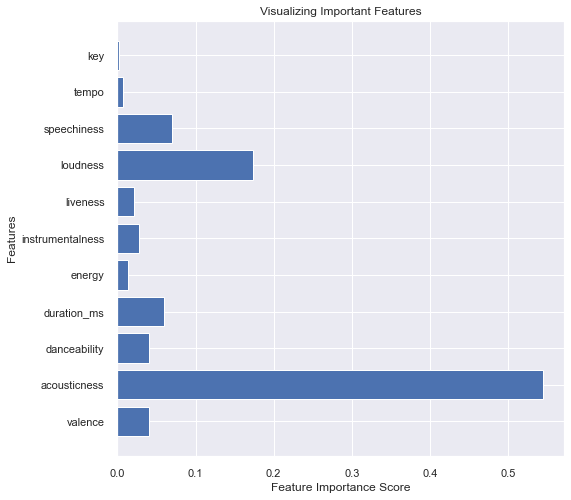

In [44]:
plot_feature_importances(dtree_clf, X_train, X)

### ROC Curve and AUC

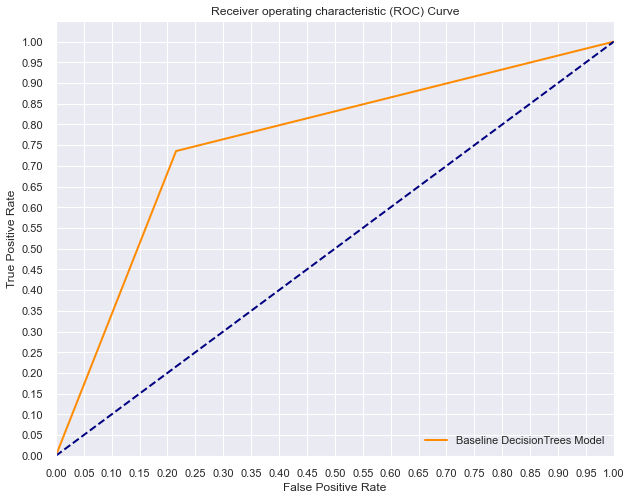

AUC: 0.7601518746337205


In [45]:
label = 'Baseline DecisionTrees Model'

roc_dt_rf(y_test, pred, label=label)

***
## DT Model 2: Bagged DecisionTree

### Instantiate classifier and fit

In [46]:
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(max_depth=5))
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5))

### Predict

In [47]:
pred = bagged_tree.predict(X_test)

### Summary Plot Mean absolute error of each feature

In [48]:
#plot_shap_tree(bagged_tree, X_train, X)

### Model Performance

Classification Report 
               precision    recall  f1-score   support

 Not Popular       0.78      0.72      0.75     22069
     Popular       0.73      0.78      0.75     20595

    accuracy                           0.75     42664
   macro avg       0.75      0.75      0.75     42664
weighted avg       0.76      0.75      0.75     42664



----------------------------------------------------------
Training Accuracy Score: 75.55%
Testing Accuracy Score: 75.38%
Accuracy: 75.38%


----------------------------------------------------------


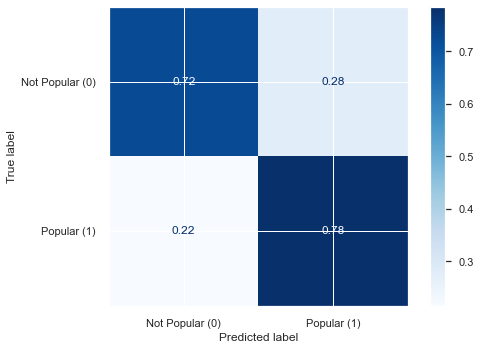

In [49]:
model_performance(bagged_tree, X_train, X_test, y_train, y_test, pred)

### ROC Curve and AUC

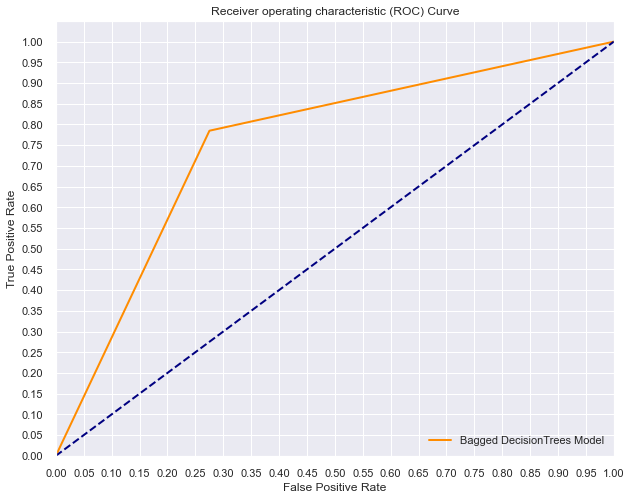

AUC: 0.754790463787509


In [50]:
label = 'Bagged DecisionTrees Model'

roc_dt_rf(y_test, pred, label=label)

***
## DT Model 3: DecisionTree GridSearch 

### Instantiate classifier

In [51]:
dtree_model = DecisionTreeClassifier() 

### Create Parameter Grid

In [52]:
dt_param_grid = {
     'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 5, 6]
}

### Instantiate GridSearchCV and fit

In [53]:
dt_grid_search = GridSearchCV(dtree_model, dt_param_grid, cv=3,
                              return_train_score=True, n_jobs=-1)

In [54]:
dt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 5, 10],
                         'min_samples_leaf': [2, 5, 6],
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True)

### Best parameters

In [55]:
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Best Parameter Combination Found During Grid Search:


{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 5}

### Predict

In [56]:
pred = dt_grid_search.predict(X_test)

### Summary Plot Mean absolute error of each feature

In [57]:
dtree_gs = DecisionTreeClassifier(criterion='gini',
                                  max_depth= 10,
                                  min_samples_leaf= 2,
                                  min_samples_split= 2)

In [58]:
dtree_gs.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2)

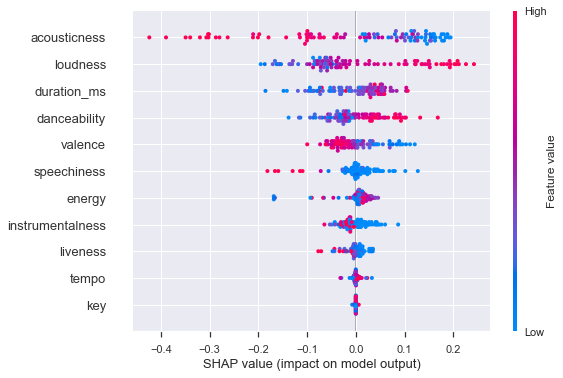

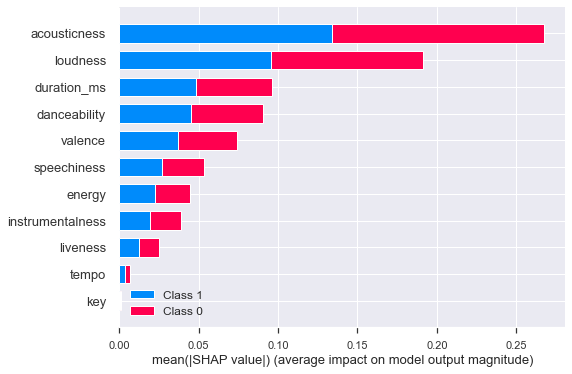

In [59]:
plot_shap_tree(dtree_gs, X_train, X)

### Model Performance

Classification Report 
               precision    recall  f1-score   support

 Not Popular       0.76      0.78      0.77     22069
     Popular       0.76      0.74      0.75     20595

    accuracy                           0.76     42664
   macro avg       0.76      0.76      0.76     42664
weighted avg       0.76      0.76      0.76     42664



----------------------------------------------------------
Training Accuracy Score: 78.38%
Testing Accuracy Score: 76.11%
Accuracy: 76.11%


----------------------------------------------------------


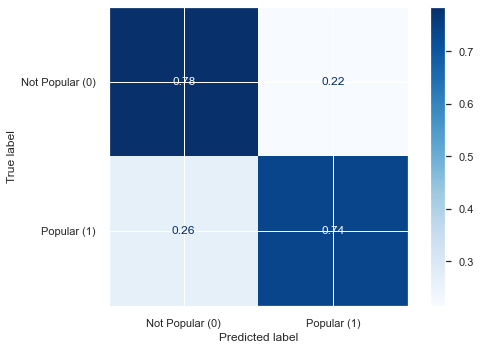

In [60]:
model_performance(dt_grid_search, X_train, X_test, y_train, y_test, pred)

### ROC Curve and AUC

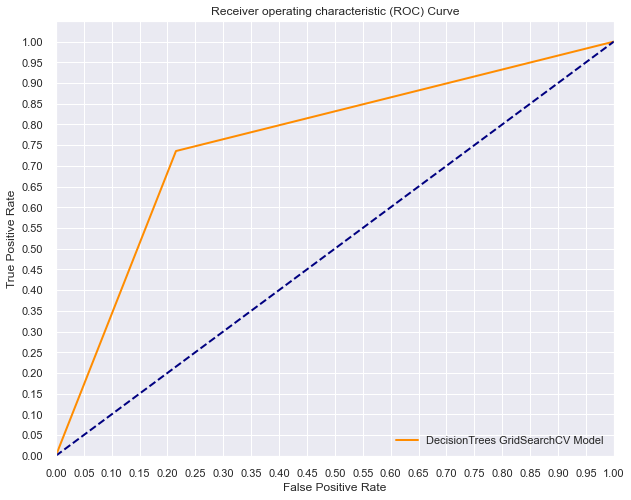

AUC: 0.760266777229434


In [61]:
label = 'DecisionTrees GridSearchCV Model'

roc_dt_rf(y_test, pred, label=label)

***
# Random Forests Models
***

## RF Model 1: Baseline Model

### Instantiate classifier and fit

In [62]:
forest = RandomForestClassifier(max_depth=10)


In [63]:
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

### Predict

In [64]:
pred = forest.predict(X_test)

### Summary Plot Mean absolute error of each feature

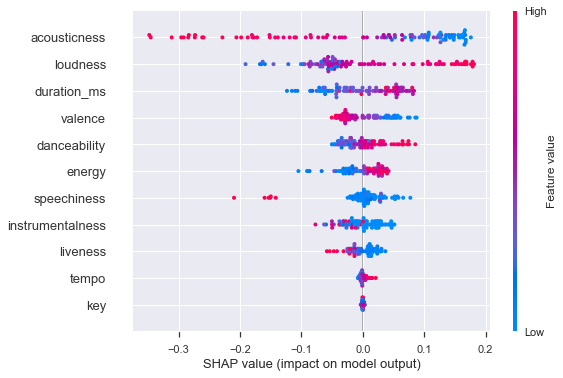

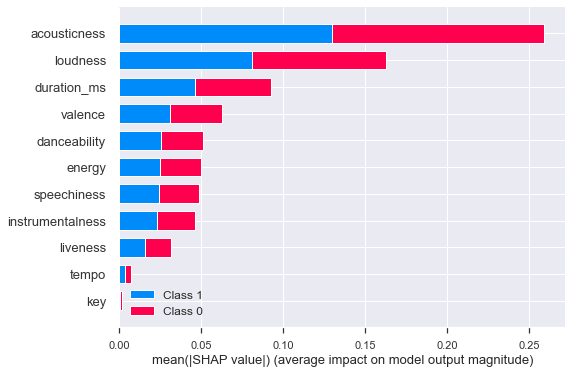

In [65]:
plot_shap_tree(forest, X_train, X)

### Model Performance

Classification Report 
               precision    recall  f1-score   support

 Not Popular       0.79      0.77      0.78     22069
     Popular       0.76      0.78      0.77     20595

    accuracy                           0.78     42664
   macro avg       0.78      0.78      0.78     42664
weighted avg       0.78      0.78      0.78     42664



----------------------------------------------------------
Training Accuracy Score: 79.66%
Testing Accuracy Score: 77.56%
Accuracy: 77.56%


----------------------------------------------------------


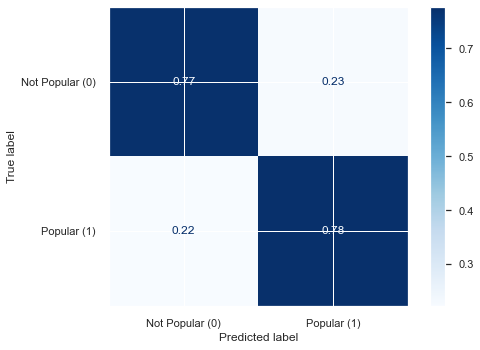

In [66]:
model_performance(forest, X_train, X_test, y_train, y_test, pred)

### ROC Curve and AUC

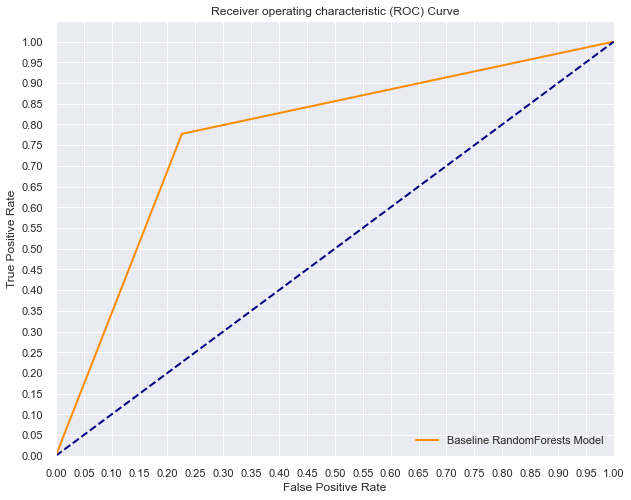

AUC: 0.7756757544654221


In [67]:
label = 'Baseline RandomForests Model'
roc_dt_rf(y_test, pred, label=label)

***
## RF Model 2: GridSearchCV Model

### Instantiate classifier

In [68]:
rforest_model = RandomForestClassifier()

### Create Parameter Grid

In [69]:
rf_param_grid = {
    'n_estimators': [10, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 5, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6]
}

### Instantiate GridSearchCV and fit

In [70]:
rf_grid_search = GridSearchCV(rforest_model, rf_param_grid, cv=3,
                            return_train_score=True, n_jobs=-1)

In [71]:
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 10], 'min_samples_leaf': [3, 6],
                         'min_samples_split': [5, 10],
                         'n_estimators': [10, 100]},
             return_train_score=True)

### Best parameters

In [72]:
print("Best Parameter Combination Found During Grid Search:")
rf_grid_search.best_params_

Best Parameter Combination Found During Grid Search:


{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 6,
 'min_samples_split': 5,
 'n_estimators': 100}

### Predict

In [73]:
pred = rf_grid_search.predict(X_test)

### Summary Plot Mean absolute error of each feature

In [74]:
rtree_gs = DecisionTreeClassifier(criterion= 'entropy',
                                  max_depth= 10,
                                  min_samples_leaf= 6,
                                  min_samples_split= 5)

In [75]:
rtree_gs.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=6,
                       min_samples_split=5)

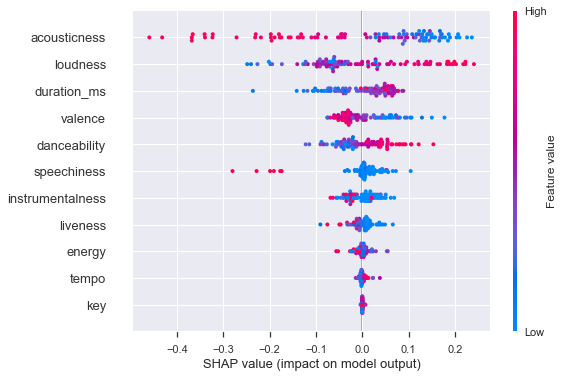

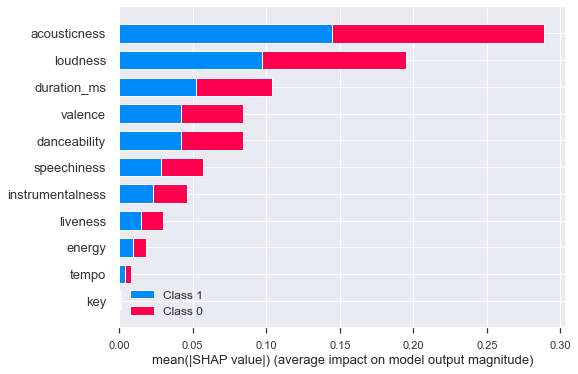

In [76]:
plot_shap_tree(rtree_gs, X_train, X)

### Model Performance

Classification Report 
               precision    recall  f1-score   support

 Not Popular       0.79      0.77      0.78     22069
     Popular       0.76      0.78      0.77     20595

    accuracy                           0.78     42664
   macro avg       0.78      0.78      0.78     42664
weighted avg       0.78      0.78      0.78     42664



----------------------------------------------------------
Training Accuracy Score: 79.26%
Testing Accuracy Score: 77.54%
Accuracy: 77.54%


----------------------------------------------------------


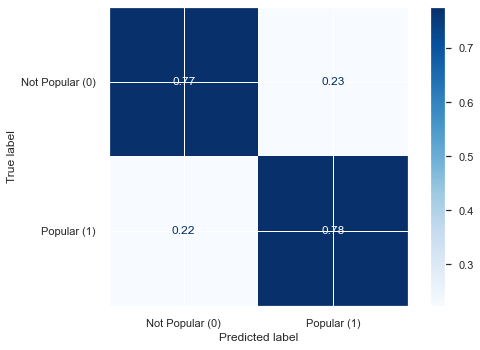

In [77]:
model_performance(rf_grid_search, X_train, X_test, y_train, y_test, pred)

### ROC Curve and AUC

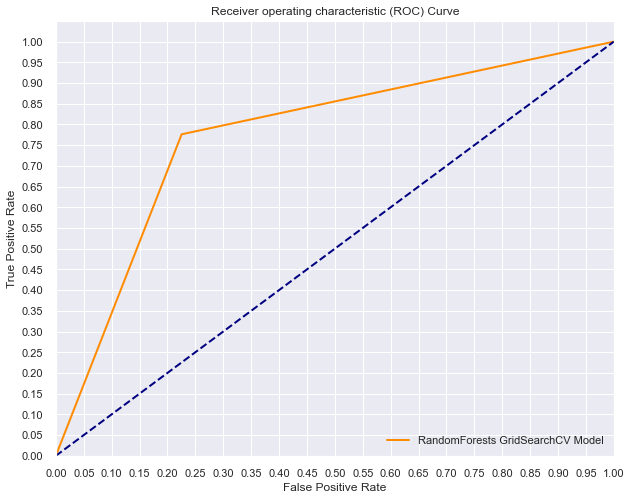

AUC: 0.775390862605091


In [78]:
label = 'RandomForests GridSearchCV Model'

roc_dt_rf(y_test, pred, label=label)

*** 
### Conclusions
The Baseline Random Forests model performed the best of all models at an accuracy of 77.68%.

For the Logistic Regression models, acousticness, valence, danceability, loudness, and speechiness were ranked to be the five most important features.

As for the Decision Trees and Random Forests models, acousticness, loudness, duration_ms, valence, and danceability were ranked to be the five most important features.

All best models agree on the following: 
* When the level of acousticness of a track is low, it has a positive shap value and is more likely to be "popular"
* When the level of loudness of a track is high, it has a positive shap value and is more likely to be "popular"
* When the level of valence of a track is low, it has a positive shap value and is more likely to be "popular"
* When the level of danceability of a track is high, it has a positive shap value and is more likely to be "popular"
*  When the level of speechiness of a track is high, it has a negative shap value and is less likely to be "popular
* key and tempo are the least important features

For an artist that wants to create popular music I would recommend to create sogns with low acoustics, a high loudness level, low valence, and high danceability.

### Problems I ran into
I ran into many issues while trying to model. One of the main problems I had was that my models were taking a long time to fit the Decision Trees and Random Forests models, especially with GridSearchCV. One thing I had to do to lower the processing time was to make shallower trees by establishing a max_depth of 10. This made it hard to improve my models significantly. This could definitely have impacted the accuracy of my results.


### Recommendations to improve models / Future Work
While modeling I realized that that recently added songs would not have high popularity scores since popularity is based on the amount of listens a song gets. I believe looking at the date and time when a song was uploaded to Spotify would improve the models.

I used a popularity threshold of 35, I would like to use the same modeling techniques on a different threshold value to see if that improves models predictions

Most songs from 1920s - early 1950s did not receive high popularity ratings. When you think about it, that makes sense. Many people using Spotify are not really listening to music from the 1920s - late 1940s. I would like to see if removing those songs would improve the model.